# <span style="color:rgb(255, 0, 255)">This document contains all the steps of data analysis for the regression model</span> 

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [2]:
data = pd.read_excel('regression_data.xls')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### <span style="color:rgb(255, 0, 255)">--- Let's look at its main features (head, shape, info).

In [3]:
data.shape

(21597, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [7]:
data.isna().sum() # Let's see nans

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### <span style="color:rgb(255, 0, 255)">--- Put the columns names on point

In [8]:
data.columns # they look pretty fine

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

### <span style="color:rgb(255, 0, 255)">--- Drop columns that we don't longer need

In [9]:
df = data.copy() # for that we are using df as a table to do all the changes
df = df.drop(['id'], axis=1)
df.head() #we don't need "id" for the model because is an ID

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### <span style="color:rgb(255, 0, 255)">--- Check for the format of date columns</span>

In [10]:
df.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

### <span style="color:rgb(255, 0, 255)"> Create a column for year, month, heck for the format of date columns</span>

<span style="color:rgb(255, 0, 255)"> Create columns for year, month, day so we can use this info for the model:

In [11]:
df['day_bought']=data['date'].dt.day
df['month_bought']=data['date'].dt.month
df['year_bought']=data['date'].dt.year

In [12]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day_bought,month_bought,year_bought
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,13,10,2014
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,9,12,2014
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,25,2,2015
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,9,12,2014
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,18,2,2015


In [13]:
df = df.drop('date', axis=1) #let's drop date because we already have that info in the new columns created
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day_bought,month_bought,year_bought
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,13,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,9,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,25,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,9,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,18,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,21,5,2014
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,23,2,2015
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,23,6,2014
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,16,1,2015


<span style="color:rgb(255, 0, 255)">They are not categorical values, lets explore each column to know how to treat them (specially the discrete ones)</span>

In [14]:
for col in df.columns:
    print(df[col].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64
5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: sqft_lot, Length: 9776, dtype: int64
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5

In [15]:
#Inspired by Luis's Code
#Check unique values for each value
for column in df.columns:
    print('─' * 10)
    print("This feature ", '\033[1m' + column + '\033[0m' ," has ", df[column].nunique(), " categories \n The single values are: ", df[column].unique(),"\n" )
    print("Here the detail: \n" , df[column].value_counts())
    print("\n\n")

──────────
This feature  bedrooms  has  12  categories 
 The single values are:  [ 3  2  4  5  1  6  7  8  9 11 10 33] 

Here the detail: 
 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64



──────────
This feature  bathrooms  has  29  categories 
 The single values are:  [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ] 

Here the detail: 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64



──────────
This feature  sqft_livi

<span style="color:rgb(255, 0, 255)">**continous** = sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, price (target), month_bought, year_bought
    
<span style="color:rgb(255, 0, 255)">**discrete** = bedrooms, bathrooms, floors, waterfront, view, condition, grade

### <span style="color:rgb(255, 0, 255)"> --- Feature selection

</span>

<span style="color:rgb(255, 0, 255)"> The goal of feature selection is to improve model accuracy by reducing the number of irrelevant or redundant features that may introduce noise or bias in the model. At this point we don't see relevant to do feature selection.

### <span style="color:rgb(255, 0, 255)">--- Visualize values

</span>

In [ ]:
# Let's see how every numerical numbers correlate with others. 
sns.pairplot(df)

In [ ]:
#Let's do a heatmap
corr = df.corr()

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Crear un mapa de calor
plt.figure(figsize=(16, 11))
sns.heatmap(corr, annot=True, cmap="YlGnBu", mask=mask)

# Mostrar el mapa de calor
plt.show()

<span style="color:rgb(255, 0, 255)"> We remove values correlated and it affected negatively  

### <span style="color:rgb(255, 0, 255)">--- Let's look at the outliers</span>

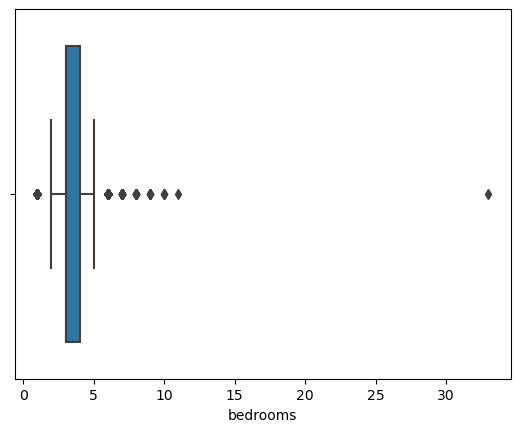

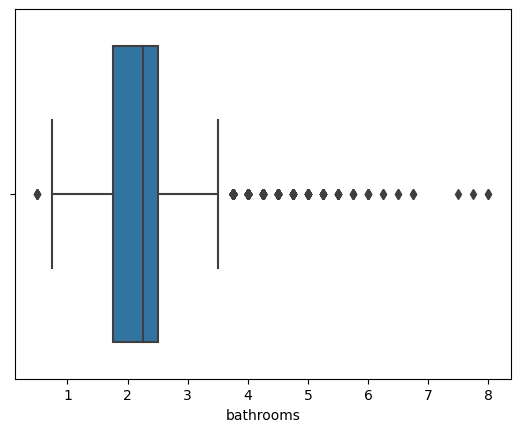

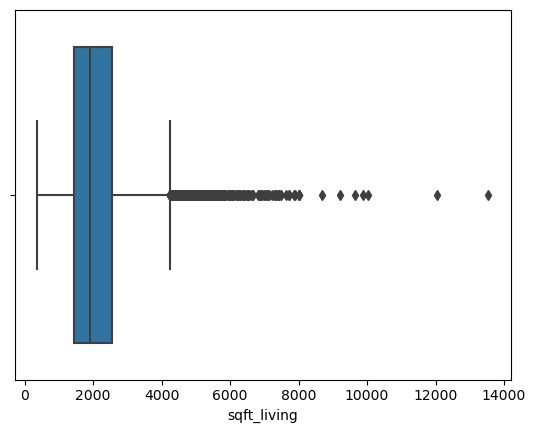

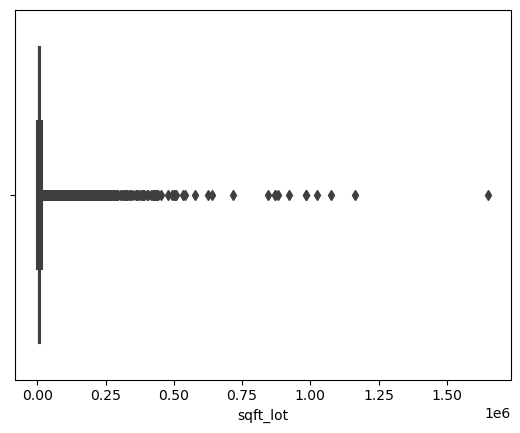

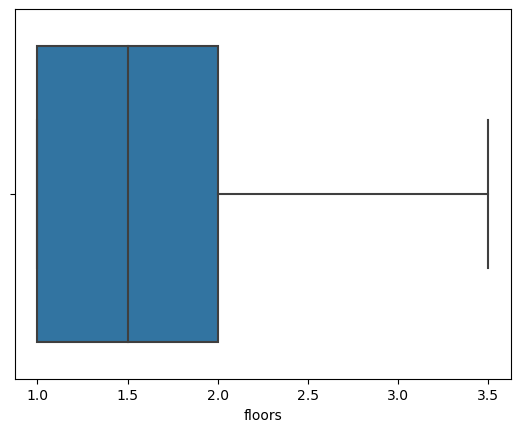

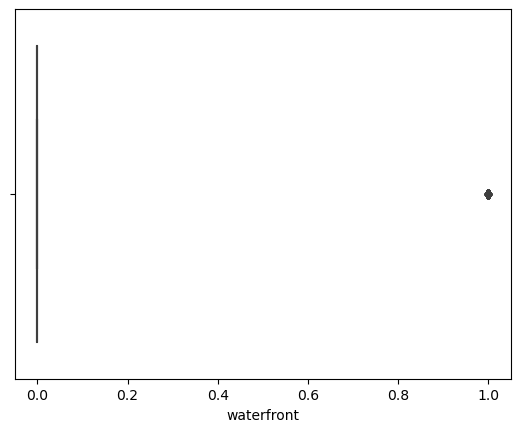

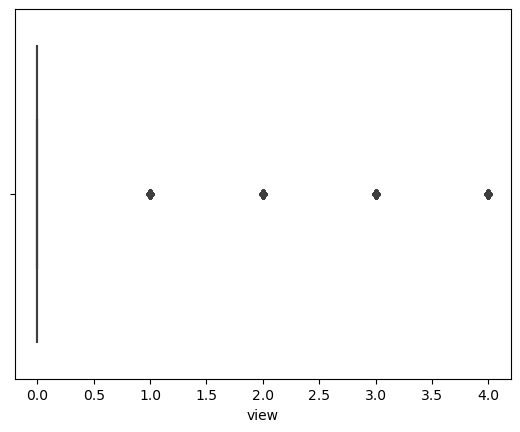

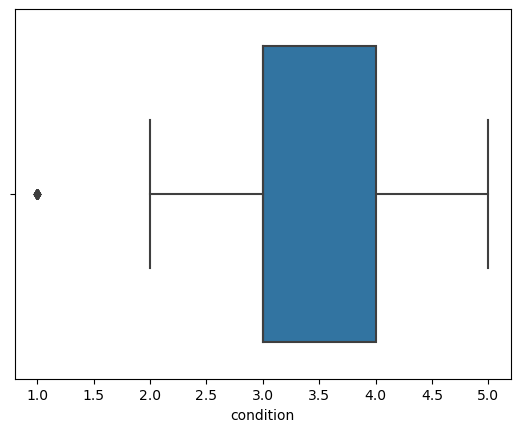

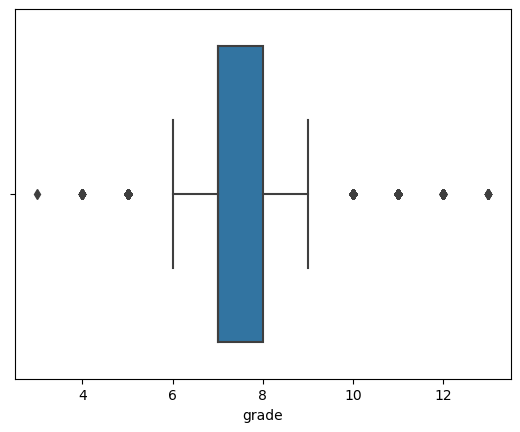

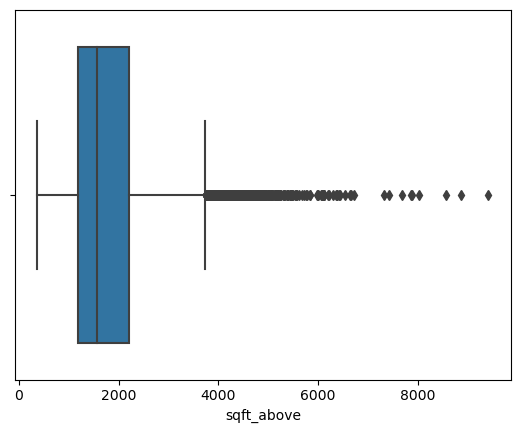

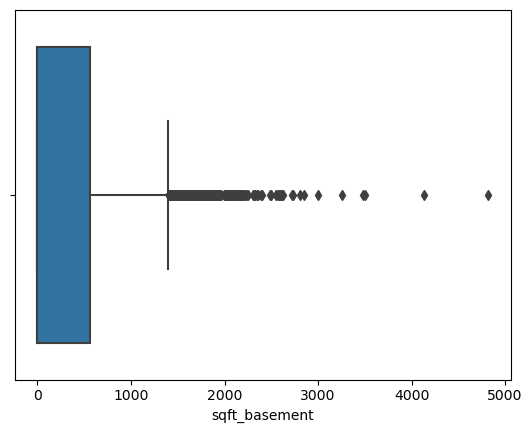

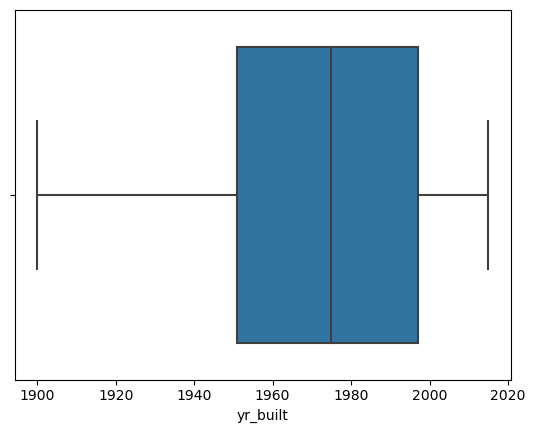

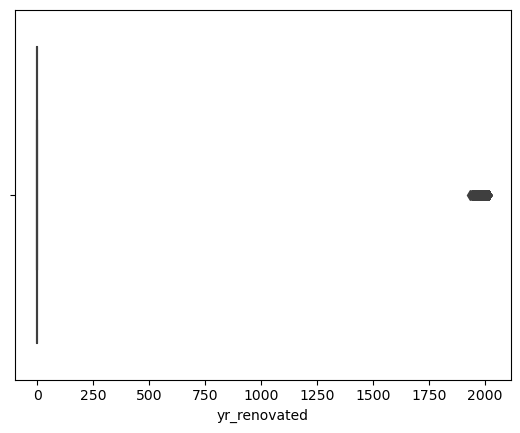

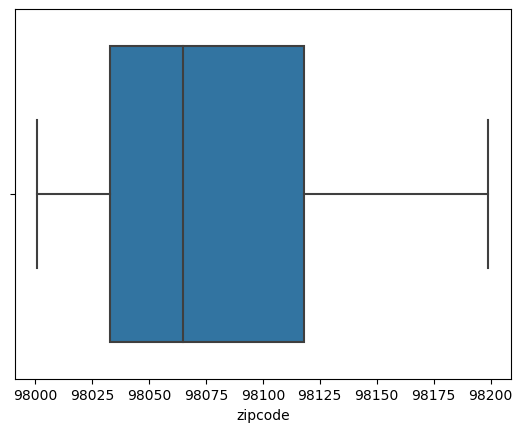

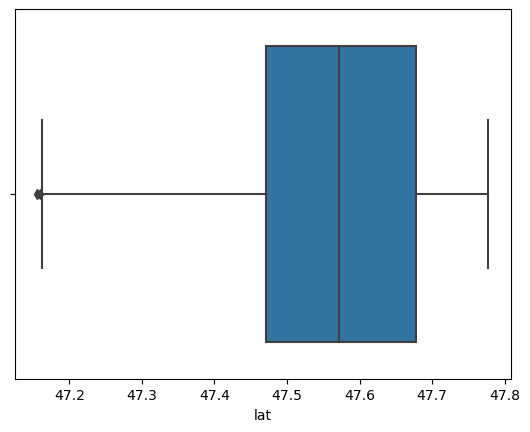

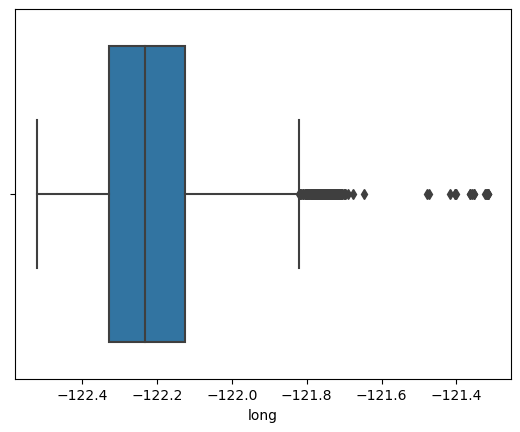

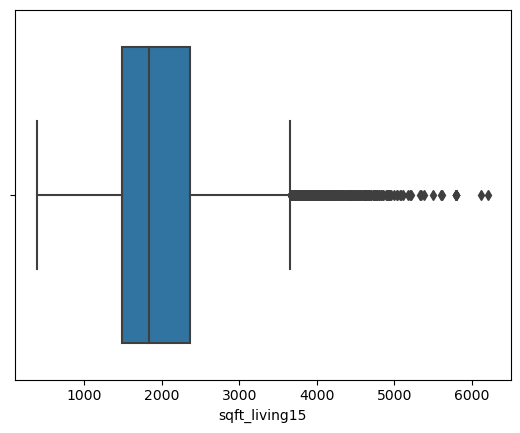

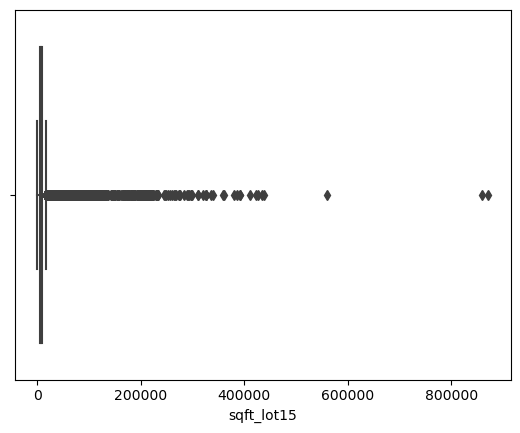

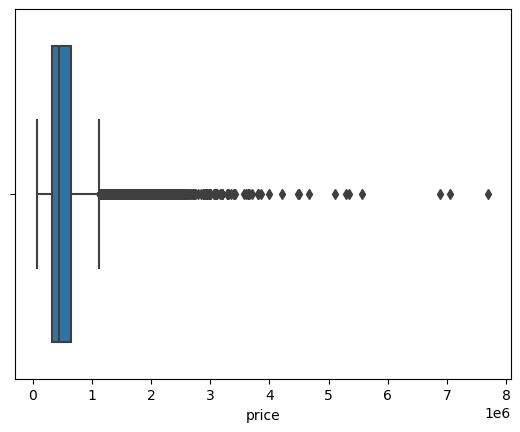

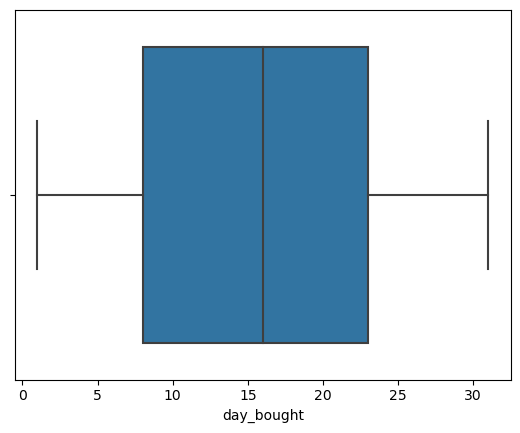

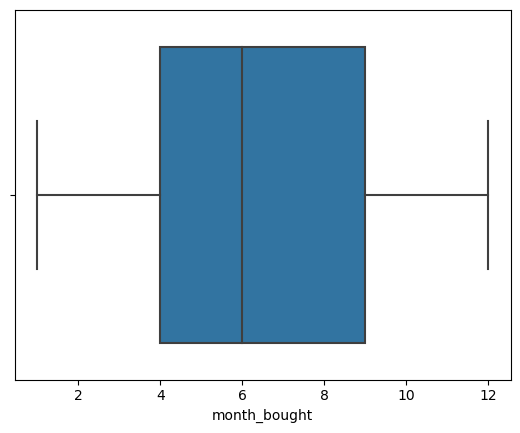

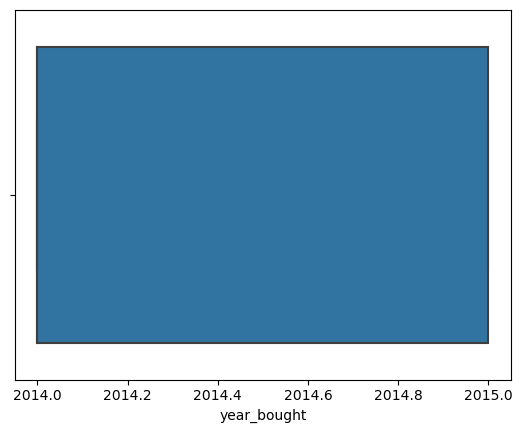

In [16]:
#Create a group of boxplots

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(x=df[col] ,whis=1.5)

### <span style="color:rgb(255, 0, 255)">--- Let's visualize data</span>

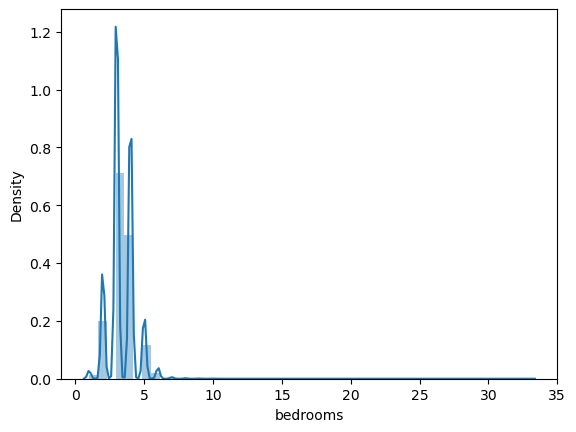

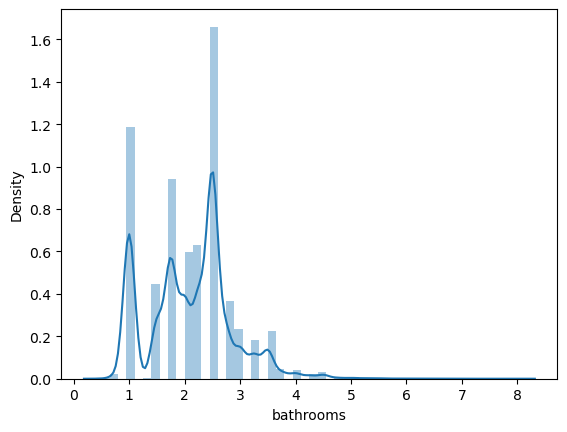

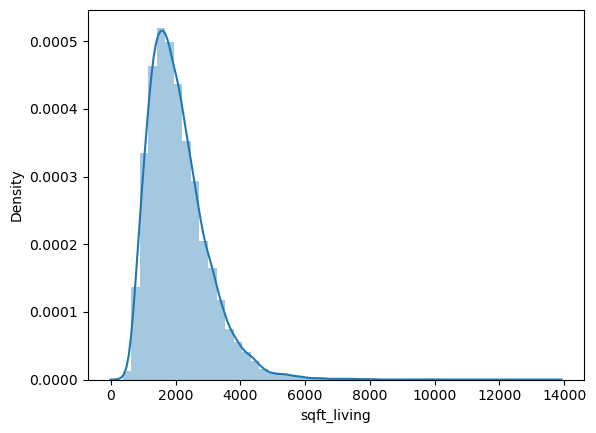

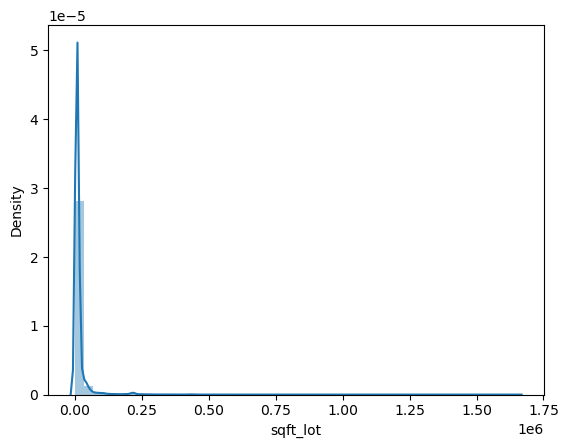

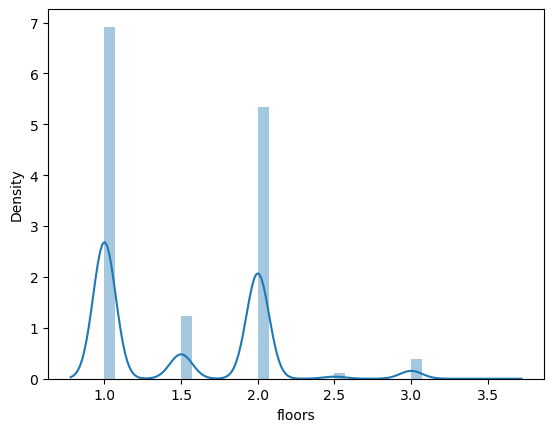

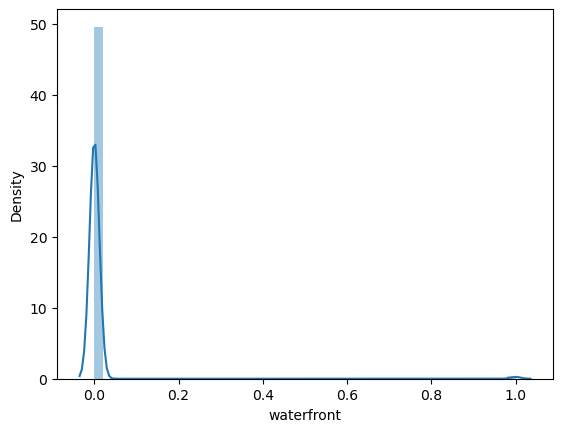

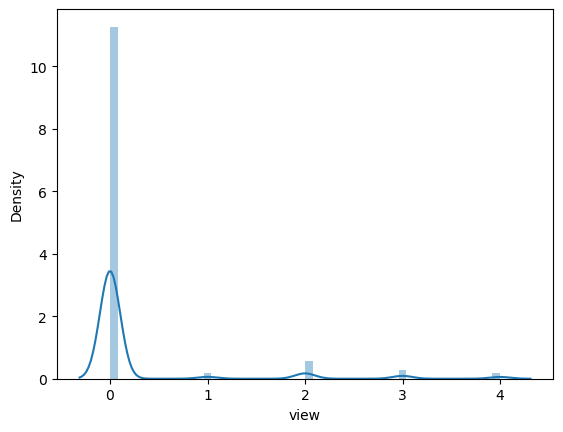

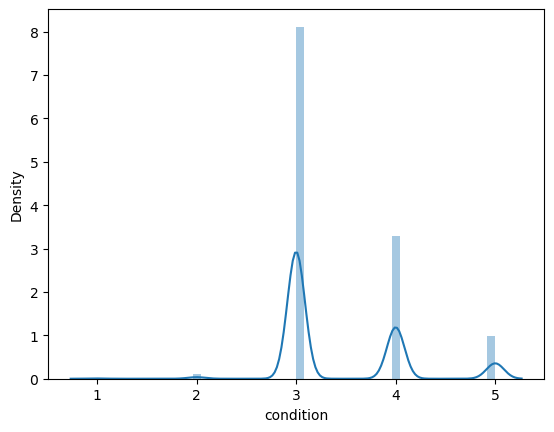

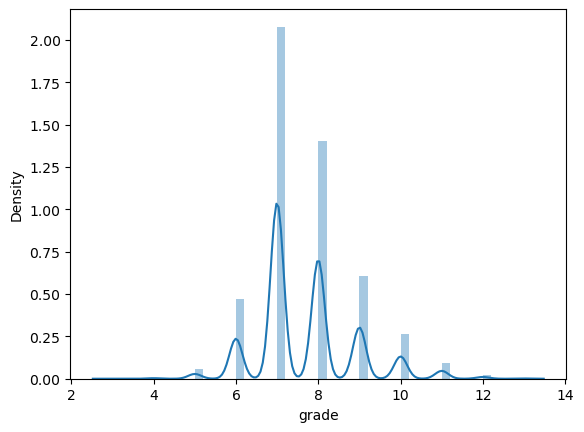

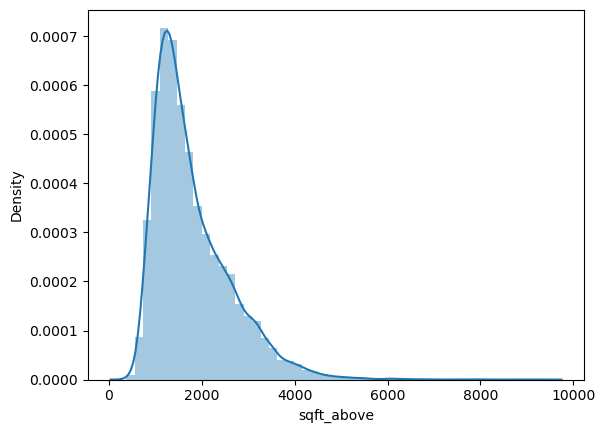

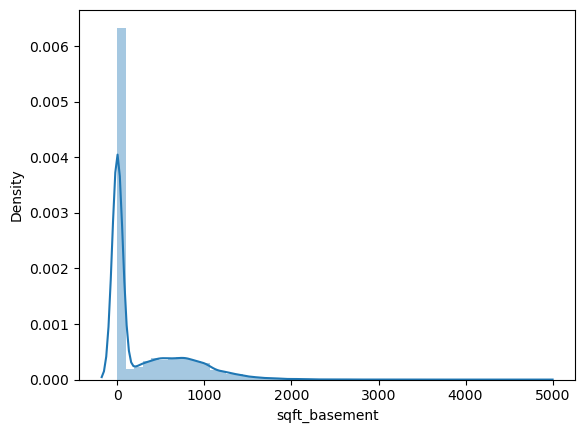

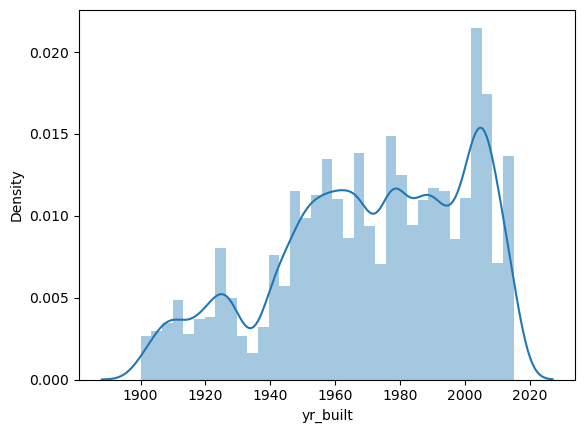

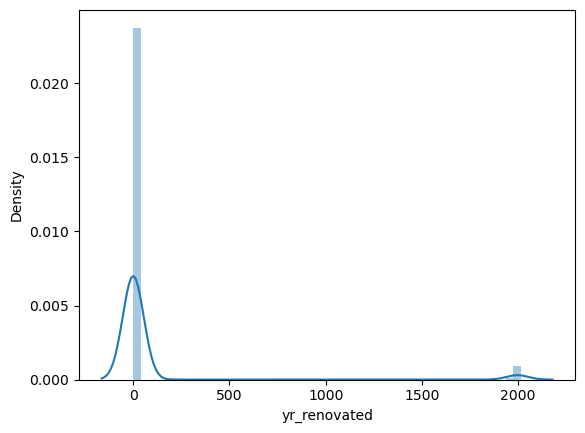

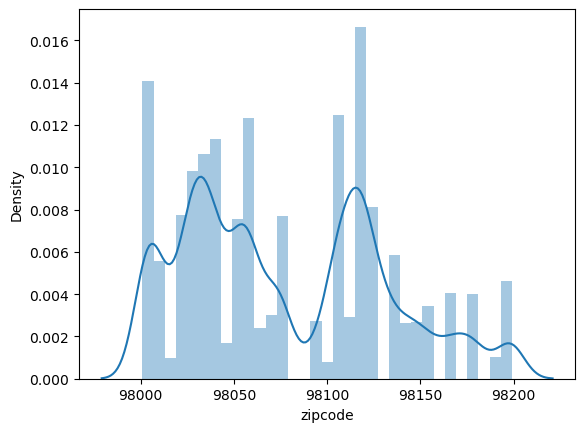

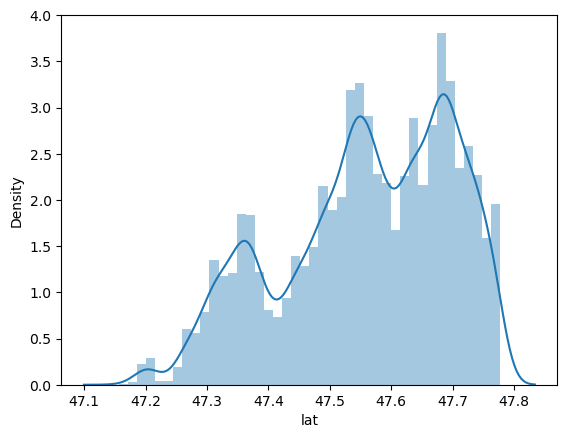

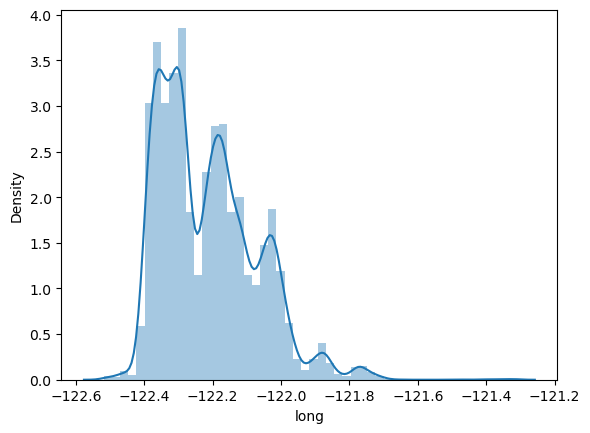

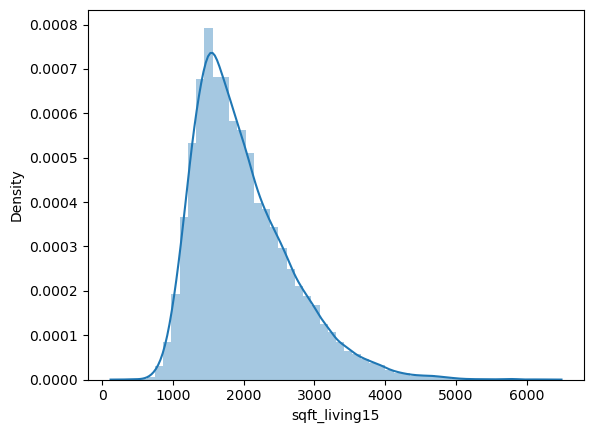

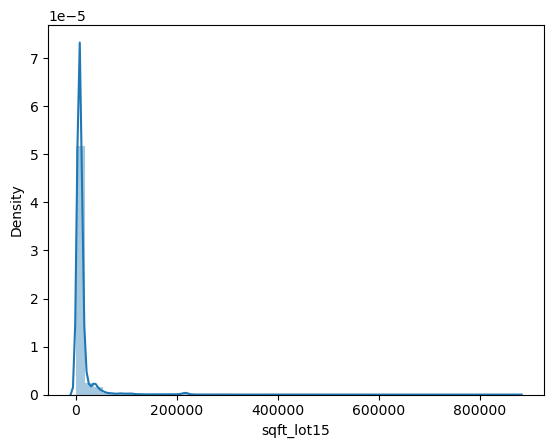

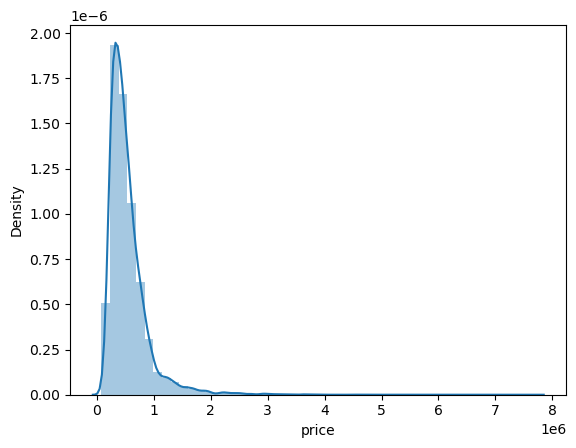

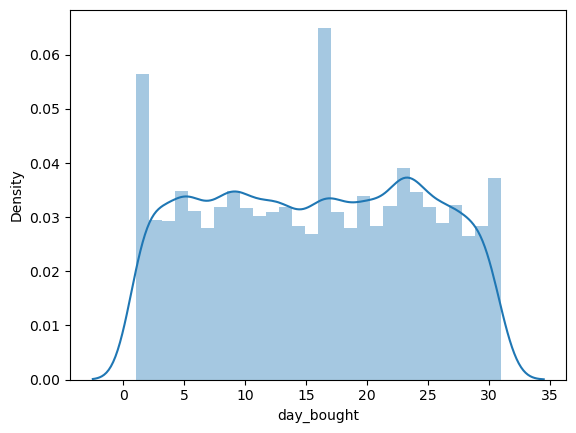

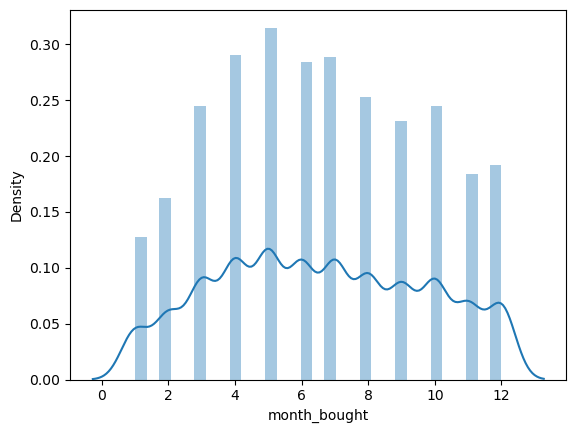

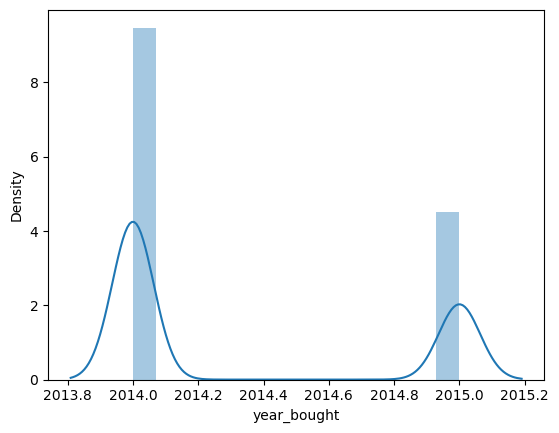

In [17]:
for column in df:
    sns.distplot(df[column])
    plt.show() 

<span style="color:rgb(255, 0, 255)"> Inside continous vlaues, we see that sqft_living, sqft_above, sqft_living15 are really skewed, we should in next steps apply log transformation to see if that affects the model

<BarContainer object of 12 artists>

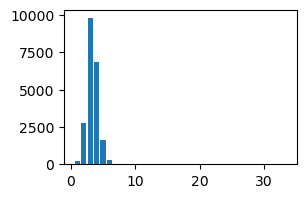

In [21]:
# Let's dive a little bit in the distribution of the columns of dicrete and continous selections

#discrete: bedrooms, bathrooms, floors, waterfront, view, condition, grade

distribution = df['bedrooms'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 29 artists>

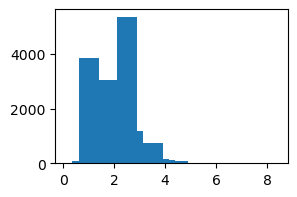

In [22]:
distribution = df['bathrooms'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 6 artists>

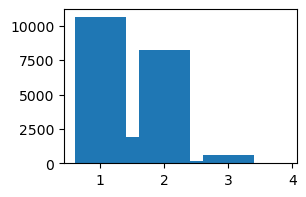

In [23]:
distribution = df['floors'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 2 artists>

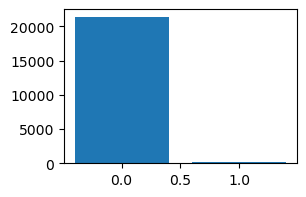

In [24]:
distribution = df['waterfront'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 5 artists>

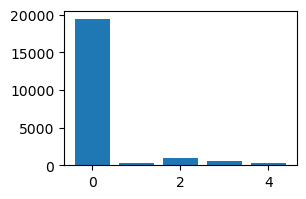

In [25]:
distribution = df['view'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 5 artists>

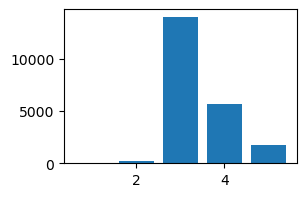

In [26]:
distribution = df['condition'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 11 artists>

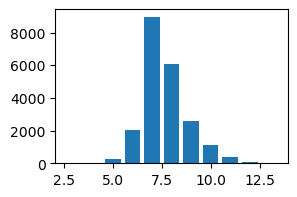

In [27]:
distribution = df['grade'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

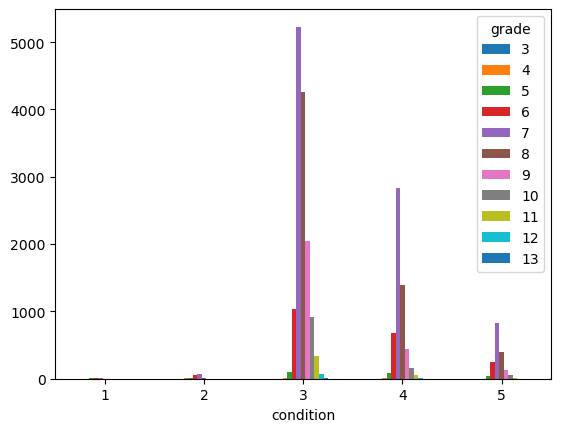

In [28]:
# We want also to see how grade and condition are related:
crosstab = pd.crosstab(df.condition, df.grade)
barplot = crosstab.plot.bar(rot=0)

### <span style="color:rgb(255, 0, 255)">--- Remove outliers</span>

<span style="color:rgb(255, 0, 255)"> In the first try we didn't remove outliers and it gave us a R2 of 0.68.

In [29]:
#Remove outliers
iqr = np.percentile(df['bedrooms'],75) - np.percentile(df['bedrooms'],25)
upper_limit = np.percentile(df['bedrooms'],75) + 1.5*iqr
lower_limit = np.percentile(df['bedrooms'],25) - 1.5*iqr
df = df[(df['bedrooms']>lower_limit) & (df['bedrooms']<upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21067 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21067 non-null  int64  
 1   bathrooms      21067 non-null  float64
 2   sqft_living    21067 non-null  int64  
 3   sqft_lot       21067 non-null  int64  
 4   floors         21067 non-null  float64
 5   waterfront     21067 non-null  int64  
 6   view           21067 non-null  int64  
 7   condition      21067 non-null  int64  
 8   grade          21067 non-null  int64  
 9   sqft_above     21067 non-null  int64  
 10  sqft_basement  21067 non-null  int64  
 11  yr_built       21067 non-null  int64  
 12  yr_renovated   21067 non-null  int64  
 13  zipcode        21067 non-null  int64  
 14  lat            21067 non-null  float64
 15  long           21067 non-null  float64
 16  sqft_living15  21067 non-null  int64  
 17  sqft_lot15     21067 non-null  int64  
 18  price 

In [30]:
#Remove outliers
iqr = np.percentile(df['sqft_living'],75) - np.percentile(df['sqft_living'],25)
upper_limit = np.percentile(df['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_living'],25) - 1.5*iqr
df = df[(df['sqft_living']>lower_limit) & (df['sqft_living']<upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20512 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       20512 non-null  int64  
 1   bathrooms      20512 non-null  float64
 2   sqft_living    20512 non-null  int64  
 3   sqft_lot       20512 non-null  int64  
 4   floors         20512 non-null  float64
 5   waterfront     20512 non-null  int64  
 6   view           20512 non-null  int64  
 7   condition      20512 non-null  int64  
 8   grade          20512 non-null  int64  
 9   sqft_above     20512 non-null  int64  
 10  sqft_basement  20512 non-null  int64  
 11  yr_built       20512 non-null  int64  
 12  yr_renovated   20512 non-null  int64  
 13  zipcode        20512 non-null  int64  
 14  lat            20512 non-null  float64
 15  long           20512 non-null  float64
 16  sqft_living15  20512 non-null  int64  
 17  sqft_lot15     20512 non-null  int64  
 18  price 

In [31]:
#Remove outliers
iqr = np.percentile(df['sqft_lot'],75) - np.percentile(df['sqft_lot'],25)
upper_limit = np.percentile(df['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_lot'],25) - 1.5*iqr
df = df[(df['sqft_lot']>lower_limit) & (df['sqft_lot']<upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18323 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       18323 non-null  int64  
 1   bathrooms      18323 non-null  float64
 2   sqft_living    18323 non-null  int64  
 3   sqft_lot       18323 non-null  int64  
 4   floors         18323 non-null  float64
 5   waterfront     18323 non-null  int64  
 6   view           18323 non-null  int64  
 7   condition      18323 non-null  int64  
 8   grade          18323 non-null  int64  
 9   sqft_above     18323 non-null  int64  
 10  sqft_basement  18323 non-null  int64  
 11  yr_built       18323 non-null  int64  
 12  yr_renovated   18323 non-null  int64  
 13  zipcode        18323 non-null  int64  
 14  lat            18323 non-null  float64
 15  long           18323 non-null  float64
 16  sqft_living15  18323 non-null  int64  
 17  sqft_lot15     18323 non-null  int64  
 18  price 

In [32]:
#Remove outliers
iqr = np.percentile(df['sqft_basement'],75) - np.percentile(df['sqft_basement'],25)
upper_limit = np.percentile(df['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_basement'],25) - 1.5*iqr
df = df[(df['sqft_basement']>lower_limit) & (df['sqft_basement']<upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17959 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17959 non-null  int64  
 1   bathrooms      17959 non-null  float64
 2   sqft_living    17959 non-null  int64  
 3   sqft_lot       17959 non-null  int64  
 4   floors         17959 non-null  float64
 5   waterfront     17959 non-null  int64  
 6   view           17959 non-null  int64  
 7   condition      17959 non-null  int64  
 8   grade          17959 non-null  int64  
 9   sqft_above     17959 non-null  int64  
 10  sqft_basement  17959 non-null  int64  
 11  yr_built       17959 non-null  int64  
 12  yr_renovated   17959 non-null  int64  
 13  zipcode        17959 non-null  int64  
 14  lat            17959 non-null  float64
 15  long           17959 non-null  float64
 16  sqft_living15  17959 non-null  int64  
 17  sqft_lot15     17959 non-null  int64  
 18  price 

### <span style="color:rgb(255, 0, 255)">--- Creating new columns


In [34]:
df["yr_diff_renovated"] = df["yr_renovated"] - df["yr_built"]
df["yr_diff_bought"] = df["year_bought"] - df["yr_built"]

In [35]:
df["sqrt_diff"] = df["sqft_lot"] - df["sqft_living"]
df["sqrt_diff_15"] = df["sqft_lot15"] - df["sqft_living15"]

In [36]:
df["yr_diff_renovated"]= df["yr_diff_renovated"].apply(lambda x: x if x>0 else 0)
df["yr_renovated_binary"] = df["yr_diff_renovated"].apply(lambda x: 1 if x>0 else 0)
df["basement_binary"] = df["sqft_basement"].apply(lambda x: 1 if x>0 else 0)

### <span style="color:rgb(255, 0, 255)">--- Transforming Skewed data with log transformation

In [37]:
# sqft_living, sqft_above, sqft_living15
df["sqft_living_log"] = np.log((df.sqft_living))
df["sqft_above_log"] = np.log((df.sqft_above))
df["sqft_living15_log"] = np.log((df.sqft_living15))


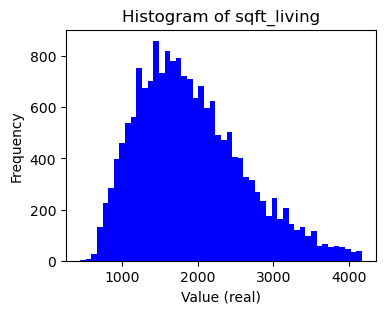

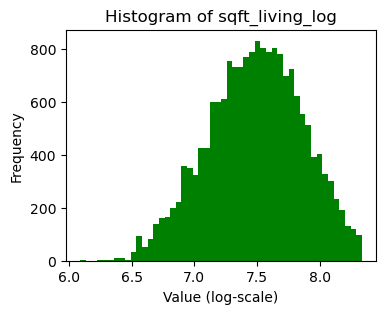

In [38]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living, bins=50, color='blue')
plt.title('Histogram of sqft_living')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living_log, bins=50, color='green')
plt.title('Histogram of sqft_living_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


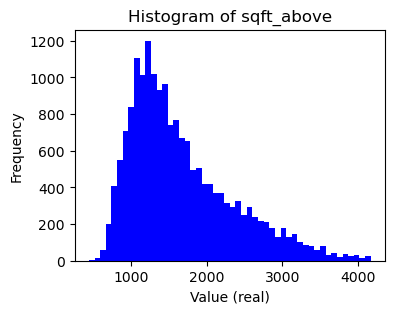

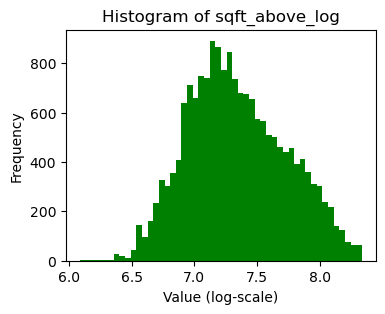

In [39]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_above, bins=50, color='blue')
plt.title('Histogram of sqft_above')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_above_log, bins=50, color='green')
plt.title('Histogram of sqft_above_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


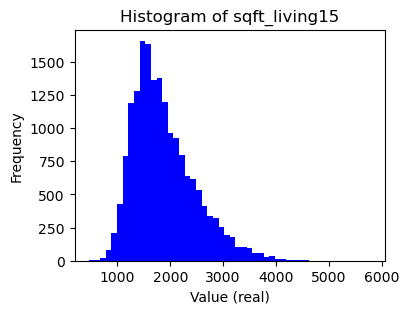

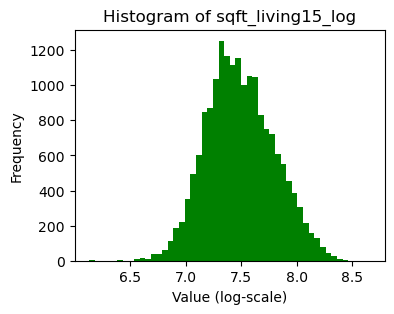

In [40]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living15, bins=50, color='blue')
plt.title('Histogram of sqft_living15')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living15_log, bins=50, color='green')
plt.title('Histogram of sqft_living15_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


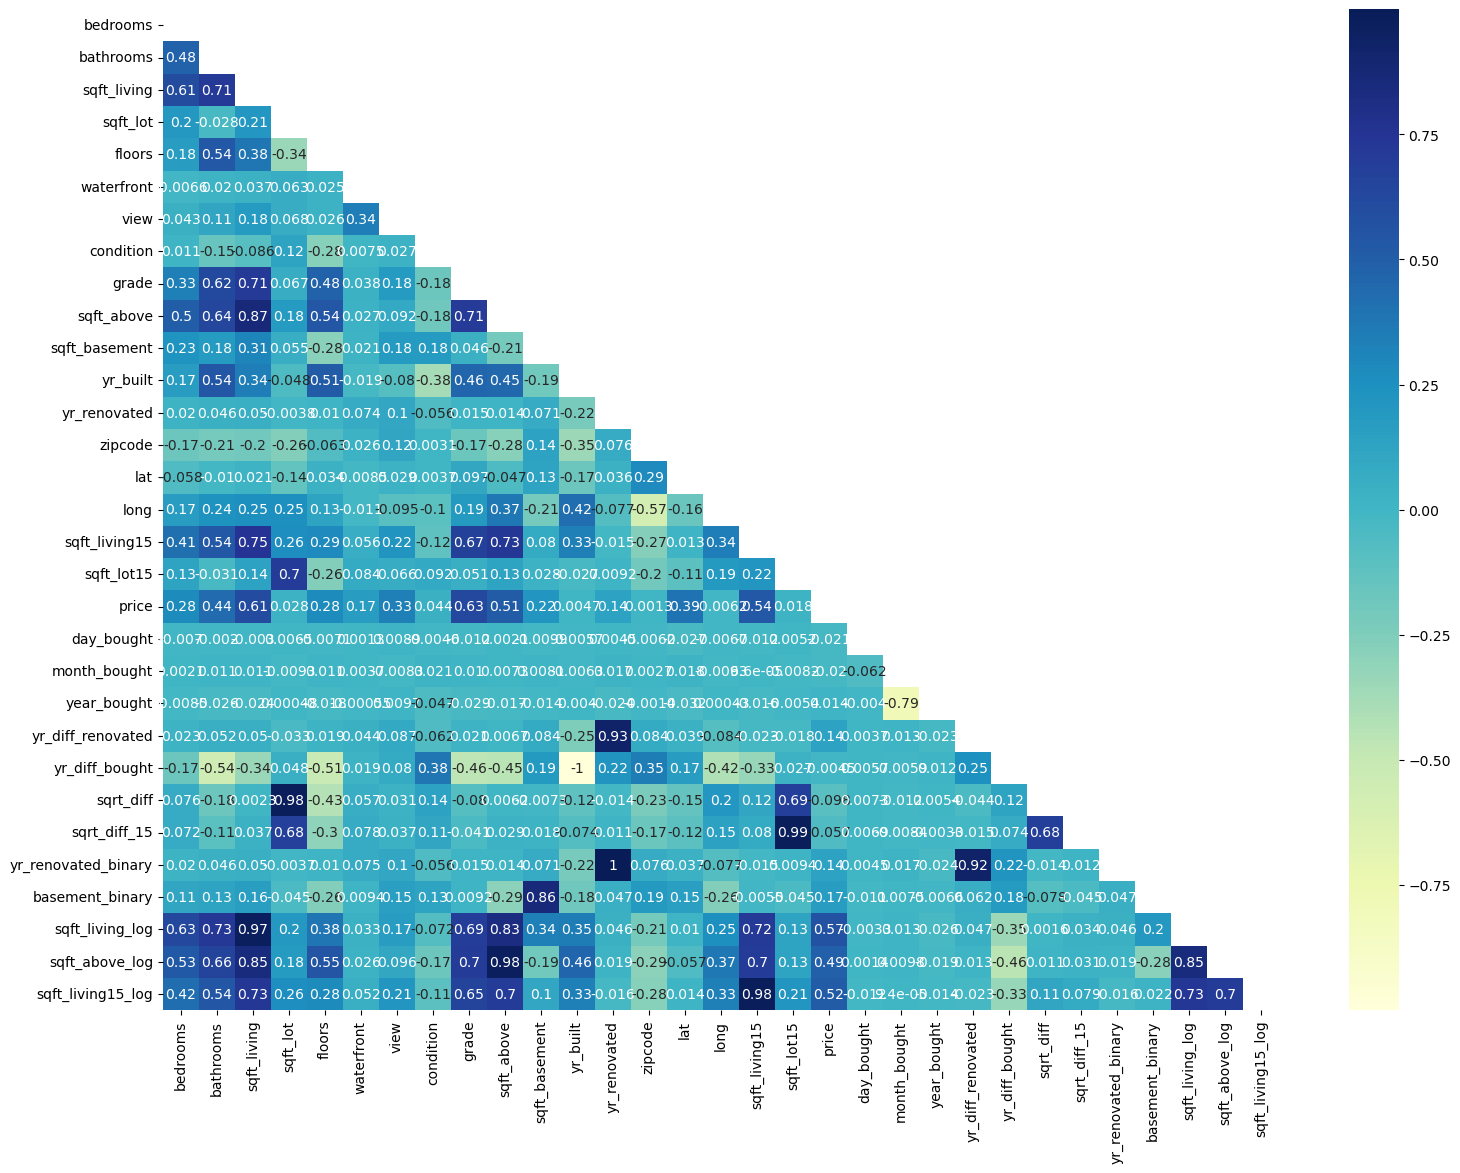

In [41]:
# let's study the correlation again with new columns
corr = df.corr()

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Crear un mapa de calor
plt.figure(figsize=(18, 13))
sns.heatmap(corr, annot=True, cmap="YlGnBu", mask=mask)

# Mostrar el mapa de calor
plt.show()

<span style="color:rgb(255, 0, 255)"> sqft_living_log is highly correlated with sqft_living (obviously), bedrooms, bathrooms, sqft_above, sqft_living15, sqft_living15_log, grade

### <span style="color:rgb(255, 0, 255)">--- Load the continuous and discrete variables into numericals and categorical variables</span>

In [43]:
# Let's update this split
num_cont = df[["sqft_living_log", "sqft_lot", "sqft_basement", "sqft_lot15", "zipcode", "yr_built", "yr_renovated", "year_bought", "month_bought", "day_bought", "yr_diff_renovated", "yr_diff_bought", "sqrt_diff", "sqrt_diff_15"]]
num_dis = df[["bedrooms", "floors", "waterfront", "view", "condition", "yr_renovated_binary"]]
target = df['price']
X_num = df.copy()
X_num = X_num.drop(columns=['price', "sqft_living", "sqft_basement"], axis=1)
X_num.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_bought,month_bought,year_bought,yr_diff_renovated,yr_diff_bought,sqrt_diff,sqrt_diff_15,yr_renovated_binary,basement_binary,sqft_living_log,sqft_above_log,sqft_living15_log
0,3,1.00,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014,0,59,4470,4310,0,0,7.073270,7.073270,7.200425
1,3,2.25,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014,40,63,4672,5949,1,1,7.851661,7.682482,7.432484
2,2,1.00,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015,0,82,9230,5342,0,0,6.646391,6.646391,7.908387
3,4,3.00,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014,0,49,3040,3640,0,1,7.580700,6.956545,7.215240
4,3,2.00,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015,0,28,6400,5703,0,0,7.426549,7.426549,7.495542


In [44]:
num_cont.shape

(17959, 14)

In [45]:
num_dis.shape

(17959, 6)

In [46]:
target.shape

(17959,)

In [47]:
X_num.shape

(17959, 28)

In [48]:
# group of features that have mid high regression coeficient
X_num2 = df[["bedrooms","sqft_living", "sqft_lot", "floors", "waterfront", "view", "grade", "sqft_above", "yr_built", "yr_renovated", "zipcode", "lat", "sqft_lot15", "day_bought", "year_bought", "yr_diff_renovated", "yr_diff_bought", "sqrt_diff", "sqrt_diff_15", "yr_renovated_binary"]]
X_num2

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,sqft_lot15,day_bought,year_bought,yr_diff_renovated,yr_diff_bought,sqrt_diff,sqrt_diff_15,yr_renovated_binary
0,3,1180,5650,1.0,0,0,7,1180,1955,0,98178,47.5112,5650,13,2014,0,59,4470,4310,0
1,3,2570,7242,2.0,0,0,7,2170,1951,1991,98125,47.7210,7639,9,2014,40,63,4672,5949,1
2,2,770,10000,1.0,0,0,6,770,1933,0,98028,47.7379,8062,25,2015,0,82,9230,5342,0
3,4,1960,5000,1.0,0,0,7,1050,1965,0,98136,47.5208,5000,9,2014,0,49,3040,3640,0
4,3,1680,8080,1.0,0,0,8,1680,1987,0,98074,47.6168,7503,18,2015,0,28,6400,5703,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,1530,1131,3.0,0,0,8,1530,2009,0,98103,47.6993,1509,21,2014,0,5,-399,-21,0
21593,4,2310,5813,2.0,0,0,8,2310,2014,0,98146,47.5107,7200,23,2015,0,1,3503,5370,0
21594,2,1020,1350,2.0,0,0,7,1020,2009,0,98144,47.5944,2007,23,2014,0,5,330,987,0
21595,3,1600,2388,2.0,0,0,8,1600,2004,0,98027,47.5345,1287,16,2015,0,11,788,-123,0


In [49]:
# group of the highest positive or negative regression coeficient
X_num3 = df[["grade","zipcode", "lat", "sqft_lot15", "day_bought", "year_bought"]]

### <span style="color:rgb(255, 0, 255)">--- Scaling

In [50]:
X_num.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'day_bought',
       'month_bought', 'year_bought', 'yr_diff_renovated', 'yr_diff_bought',
       'sqrt_diff', 'sqrt_diff_15', 'yr_renovated_binary', 'basement_binary',
       'sqft_living_log', 'sqft_above_log', 'sqft_living15_log'],
      dtype='object')

In [51]:
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(17959, 28)

### <span style="color:rgb(255, 0, 255)">--- Try test split


In [52]:
X = X_num_normalized.copy()
Y = target
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [53]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

(4490,)

In [54]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.703835193427421
RMSE =  141763.7965688931
MSE =  20096974017.626503


### <span style="color:rgb(255, 0, 255)">--- Trying different models


In [55]:
def modeling(y, X, models=[], test_size=0.25):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        # r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        r2_adj =  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7
R2 adjusted = 0.7
RMSE = 142324.98
MSE = 20256400821.47
MAE = 96357.28
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7
R2 adjusted = 0.74
RMSE = 144448.18
MSE = 20865277827.77
MAE = 86580.19
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.77
R2 adjusted = 0.87
RMSE = 125298.28
MSE = 15699658783.63
MAE = 72310.05
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.85
R2 adjusted = 0.9
RMSE = 101387.42
MSE = 10279409525.94
MAE = 61540.56


In [57]:
# Coefficient values

reg = LinearRegression()
reg.fit(X_train, y_train)

# Get the coefficients and feature names
coef = reg.coef_
feature_names = df.columns

# Print the coefficients and feature names
for feature, coef in zip(feature_names, coef):
    print(f"{feature}: {coef:.2f}")
    
# high negative of positive coef: bedrooms,sqft_living, sqft_lot, floors, waterfront, view, grade, sqft_above, yr_built, yr_renovated, zipcode, lat, sqft_lot15, day_bought, year_bought, yr_diff_renovated, yr_diff_bought, sqrt_diff, sqrt_diff_15, yr_renovated_binary     

bedrooms: -34755.96
bathrooms: 160031.36
sqft_living: 4584270.70
sqft_lot: 44833.00
floors: 419551.15
waterfront: 184682.82
view: 135552.85
condition: 761944.29
grade: -112314.01
sqft_above: 1096813070239941632.00
sqft_basement: 7256029.15
yr_built: -90647.12
yr_renovated: 356095.57
zipcode: -112097.16
lat: 939973389916644.00
long: -34555044265354088.00
sqft_living15: -11148.13
sqft_lot15: 325.83
price: -9537504958581706.00
day_bought: -96436.85
month_bought: 1106350575198825088.00
year_bought: -5015851.81
yr_diff_renovated: 34590668022187068.00
yr_diff_bought: -7091861.07
sqrt_diff: 59967.48
sqrt_diff_15: -963079.27
yr_renovated_binary: 411255.53
basement_binary: -176561.25


# Feature importance


from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the feature importance scores
importances = rf.feature_importances_

# Print the feature importance scores
for feature, importance in zip(df.columns, importances):
    print(f"{feature}: {importance:.2f}")